# Unnormalized qn transformed: breast, prostate, thyroid

The unnormalized and quantile normalized breast, prostate and thyroid

In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [2]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
source_file = 'unnorm-qn-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-qn-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)
save_file = 'calibrated-unnorm-qn-20PC-GTEX-breast-prostate-thyroid.csv'
save_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + save_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + target_file)


rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))


gtex = source shape = (636, 20)
tcga = target shape = (211, 20)


In [4]:
rnaNet.init_res_net()

setting scales using KNN
[23.246011511105838, 46.492023022211676, 92.984046044423351]
setting all scale weights to 1
(636, 20)


In [5]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=1000, callbacks=callbacks)

Train on 572 samples, validate on 64 samples
Epoch 1/1000
572/572 [==============================] - 1s 1ms/step - loss: 1.2624 - val_loss: 1.7888
Epoch 2/1000
572/572 [==============================] - 0s 483us/step - loss: 1.1658 - val_loss: 1.8264
Epoch 3/1000
572/572 [==============================] - 0s 486us/step - loss: 1.1127 - val_loss: 1.8008
Epoch 4/1000
572/572 [==============================] - 0s 481us/step - loss: 1.0644 - val_loss: 1.6947
Epoch 5/1000
572/572 [==============================] - 0s 491us/step - loss: 1.0641 - val_loss: 1.7546
Epoch 6/1000
572/572 [==============================] - 0s 485us/step - loss: 1.0468 - val_loss: 1.6971
Epoch 7/1000
572/572 [==============================] - 0s 493us/step - loss: 1.0483 - val_loss: 1.6934
Epoch 8/1000
572/572 [==============================] - 0s 490us/step - loss: 1.0393 - val_loss: 1.6757
Epoch 9/1000
572/572 [==============================] - 0s 482us/step - loss: 1.0343 - val_loss: 1.7236
Epoch 10/1000
572/572

572/572 [==============================] - 0s 503us/step - loss: 0.9337 - val_loss: 1.6047
Epoch 79/1000
572/572 [==============================] - 0s 515us/step - loss: 0.9323 - val_loss: 1.6502
Epoch 80/1000
572/572 [==============================] - 0s 509us/step - loss: 0.9674 - val_loss: 1.6645
Epoch 81/1000
572/572 [==============================] - 0s 510us/step - loss: 0.9308 - val_loss: 1.5906
Epoch 82/1000
572/572 [==============================] - 0s 503us/step - loss: 0.9124 - val_loss: 1.6303
Epoch 83/1000
572/572 [==============================] - 0s 512us/step - loss: 0.9210 - val_loss: 1.7178
Epoch 84/1000
572/572 [==============================] - 0s 510us/step - loss: 0.9402 - val_loss: 1.6519
Epoch 85/1000
572/572 [==============================] - 0s 510us/step - loss: 0.9232 - val_loss: 1.6090
Epoch 86/1000
572/572 [==============================] - 0s 512us/step - loss: 0.9232 - val_loss: 1.7258
Epoch 87/1000
572/572 [==============================] - 0s 510us/ste

572/572 [==============================] - 0s 490us/step - loss: 0.9715 - val_loss: 1.5162
Epoch 156/1000
572/572 [==============================] - 0s 490us/step - loss: 0.9265 - val_loss: 1.6817
Epoch 157/1000
572/572 [==============================] - 0s 499us/step - loss: 0.9265 - val_loss: 1.5485
Epoch 158/1000
572/572 [==============================] - 0s 488us/step - loss: 0.9168 - val_loss: 1.6349
Epoch 159/1000
572/572 [==============================] - 0s 492us/step - loss: 0.9243 - val_loss: 1.5561
Epoch 160/1000
572/572 [==============================] - 0s 494us/step - loss: 0.9163 - val_loss: 1.5760
Epoch 161/1000
572/572 [==============================] - 0s 543us/step - loss: 0.9367 - val_loss: 1.6836
Epoch 162/1000
572/572 [==============================] - 0s 587us/step - loss: 0.9030 - val_loss: 1.6152
Epoch 163/1000
572/572 [==============================] - 0s 570us/step - loss: 0.9350 - val_loss: 1.5963
Epoch 164/1000
572/572 [==============================] - 0s 

In [6]:
rnaNet.pca()

In [7]:
from plots import scatter_plot, heatmap

%matplotlib inline

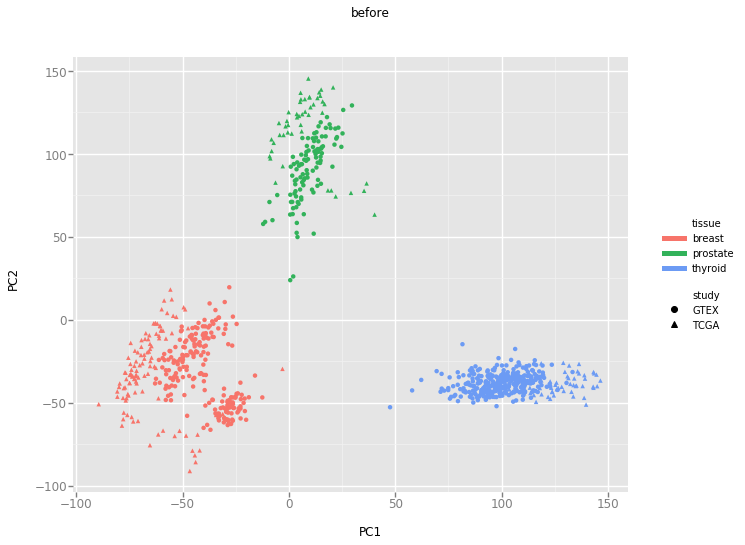

<ggplot: (-9223363289805728091)>


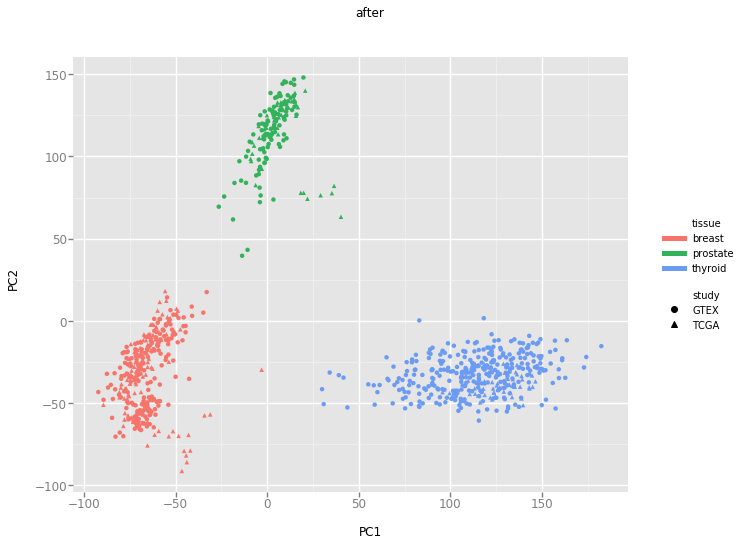

<ggplot: (8747041108074)>


In [8]:
scatter_plot(rnaNet.source_pca_df, rnaNet.target_pca_df, title="before")
scatter_plot(rnaNet.calibrated_source_pca_df, rnaNet.target_pca_df, title="after")

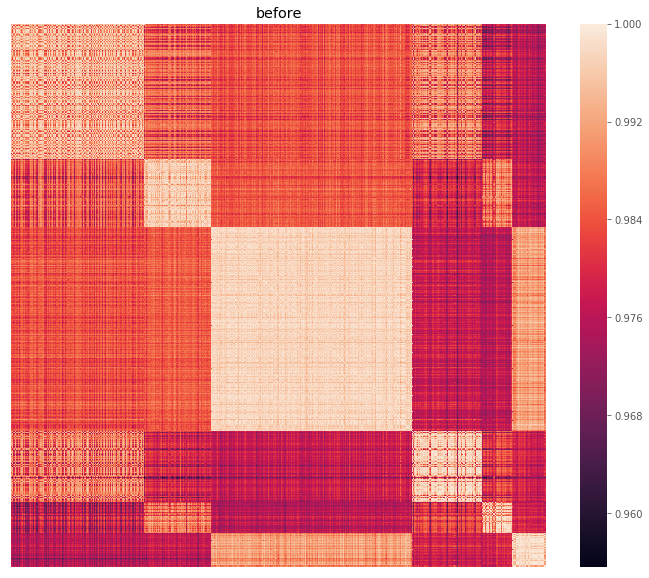

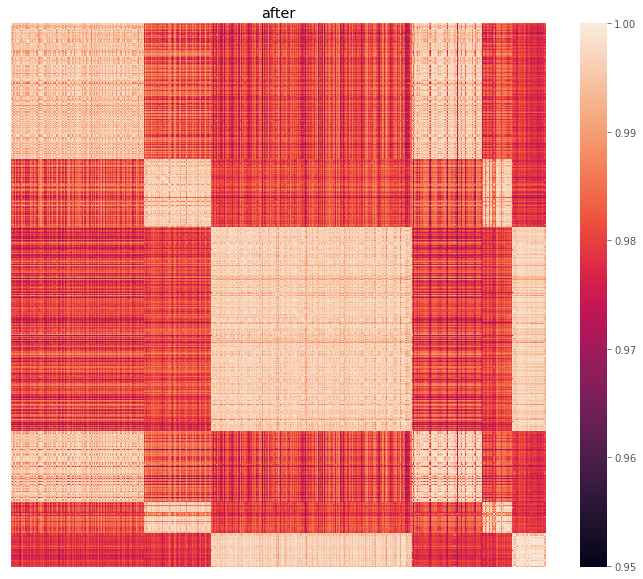

In [9]:
heatmap(rnaNet.source_df, rnaNet.target_df, title="before")
heatmap(rnaNet.calibrated_source_df, rnaNet.target_df, title="after")

In [ ]:
rnaNet.save_calibrated(path=save_path)